# Data cleaning and loading csv files

In [1]:
%%capture
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install IPython
!{sys.executable} -m pip install kaggle

In [2]:
# Import modules
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ipywidgets import widgets, Layout
from IPython.display import display
from zipfile import ZipFile
from pathlib import Path
import os
import sys
import warnings

In [3]:
warnings.filterwarnings('ignore')
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()+'\\kaggle'

In [4]:
import kaggle.cli

In [5]:
my_dataset = "nadyinky/sephora-products-and-skincare-reviews"


sys.argv = [sys.argv[0]] + f"datasets download {my_dataset}".split(" ")
kaggle.cli.main()

zip_files = ZipFile(f"{my_dataset.split('/')[1]}.zip")

dfs = {f.filename:pd.read_csv(zip_files.open(f)) for f in zip_files.infolist() }



sephora-products-and-skincare-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Import csv files
review_1 = dfs['reviews_0-250.csv']

In [7]:
review_2 = dfs['reviews_250-500.csv']

In [8]:
review_3 = dfs['reviews_500-750.csv']

In [9]:
review_4 = dfs['reviews_750-1250.csv']

In [10]:
review_5 = dfs['reviews_1250-end.csv']

In [11]:
# Merge all the csv files
reviews = pd.concat([review_1, review_2, review_3, review_4, review_5])

In [12]:
reviews

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,49972,2276253200,5,1.0,NaN,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,NaN,fair,brown,combination,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49973,49973,28013163278,5,1.0,NaN,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,NaN,NaN,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49974,49974,1539813076,5,1.0,NaN,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,NaN,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49975,49975,5595682861,5,1.0,NaN,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,NaN,fair,hazel,oily,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0


In [13]:
# check if there are duplicates
reviews.duplicated().any()

False

In [14]:
# Determine data types
reviews.dtypes

Unnamed: 0                    int64
author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object

In [15]:
# Removing object data types
reviews_numeric = reviews.loc[:, reviews.dtypes != object]

In [16]:
reviews_numeric.dtypes

Unnamed: 0                    int64
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
price_usd                   float64
dtype: object

In [17]:
del reviews_numeric['Unnamed: 0']

In [18]:
reviews_numeric

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
0,5,1.0,1.0,2,0,2,19.0
1,1,0.0,NaN,0,0,0,24.0
2,5,1.0,NaN,0,0,0,24.0
3,5,1.0,NaN,0,0,0,24.0
4,5,1.0,NaN,0,0,0,24.0
...,...,...,...,...,...,...,...
49972,5,1.0,NaN,0,0,0,49.0
49973,5,1.0,NaN,0,0,0,49.0
49974,5,1.0,NaN,0,0,0,49.0
49975,5,1.0,NaN,0,0,0,49.0


In [19]:
# Replace all the null values by zero
reviews_numeric_clean = reviews_numeric.fillna(0)

In [20]:
reviews_numeric_clean

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
0,5,1.0,1.0,2,0,2,19.0
1,1,0.0,0.0,0,0,0,24.0
2,5,1.0,0.0,0,0,0,24.0
3,5,1.0,0.0,0,0,0,24.0
4,5,1.0,0.0,0,0,0,24.0
...,...,...,...,...,...,...,...
49972,5,1.0,0.0,0,0,0,49.0
49973,5,1.0,0.0,0,0,0,49.0
49974,5,1.0,0.0,0,0,0,49.0
49975,5,1.0,0.0,0,0,0,49.0


# The summary of the dataset

In [21]:
# The summary of the dataset
reviews_numeric_clean.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06
mean,4.299158e+00,7.110309e-01,3.737984e-01,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01
std,1.149444e+00,4.532838e-01,4.429952e-01,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,5.000000e+00,1.000000e+00,9.130430e-01,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01
max,5.000000e+00,1.000000e+00,1.000000e+00,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03


# Visualisation of Total Positive Feedback of Sephora's Skin Care Products

In [22]:
# Load the x and y
x = reviews_numeric_clean['total_feedback_count']
y = reviews_numeric_clean['total_pos_feedback_count']

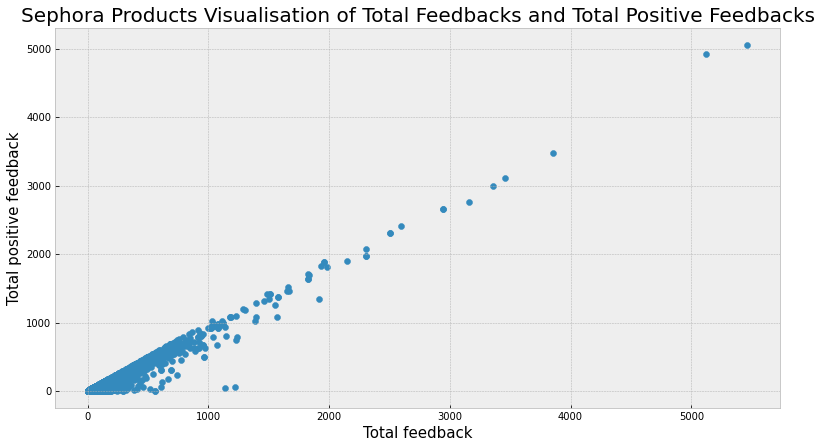

In [23]:
# Visualisation of Total Positive Feedback of Sephora's Skin Care Products
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (13,7)
plt.xlabel("Total feedback", fontsize=15)
plt.ylabel("Total positive feedback", fontsize=15)
plt.title("Sephora Products Visualisation of Total Feedbacks and Total Positive Feedbacks", fontsize=20)
plt.scatter(x,y)


Text(0.5, 1.0, 'Sephora Products Histogram of Total Feedbacks')

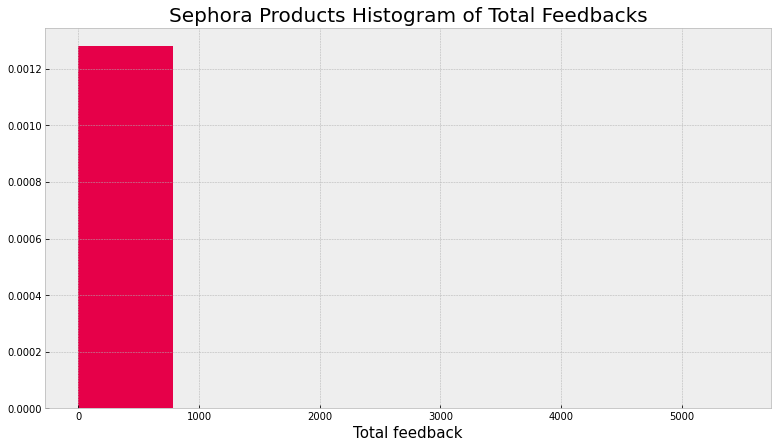

In [24]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (13,7)
plt.hist(x, 7, density=True, color='#e60049')
plt.xlabel("Total feedback", fontsize=15)
plt.title("Sephora Products Histogram of Total Feedbacks", fontsize=20)

Text(0.5, 1.0, 'Sephora Products Histogram of Total Positive Feedbacks')

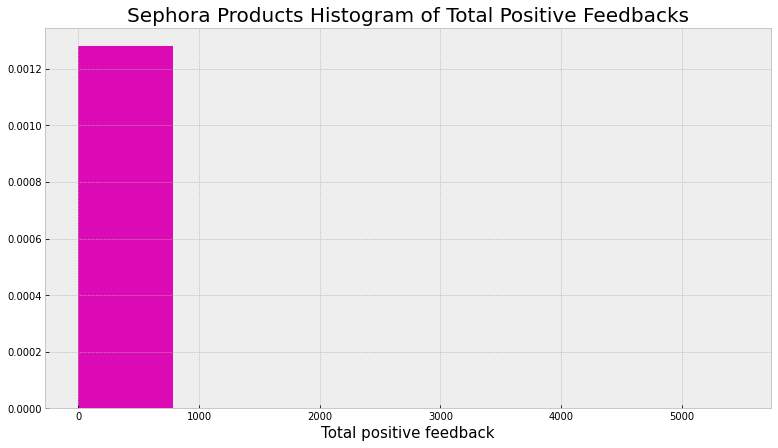

In [25]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (13,7)
plt.hist(x, 7, density=True, color='#dc0ab4')
plt.xlabel("Total positive feedback", fontsize=15)
plt.title("Sephora Products Histogram of Total Positive Feedbacks", fontsize=20)

# Filtering the Total Positive Feedback of Sephora's Skin Care Products by Ratings and Price

In [26]:
# Filtered data
rating_uniq = np.sort(reviews_numeric_clean['rating'].unique())
drop_down = widgets.Dropdown(options=rating_uniq)
from_range = widgets.Text(description='from')
to_range = widgets.Text(description='to')

widget_output = widgets.Output(layout=Layout(width='100%'))



def click(c):
    
    with widget_output:
        try:
            widget_output.clear_output()
            original_data = reviews_numeric_clean[(reviews_numeric_clean['rating'] == drop_down.value) & 
                                          (reviews_numeric_clean['price_usd'] >= float(from_range.value)) &  
                                          (reviews_numeric_clean['price_usd'] <= float(to_range.value))]
            display(original_data)
            
            x = original_data['total_feedback_count']
            y = original_data['total_pos_feedback_count']
            plt.style.use("bmh")
            plt.rcParams["figure.figsize"] = (13,7)
            plt.xlabel("Total feedback", fontsize=15)
            plt.ylabel("Total positive feedback", fontsize=15)
            plt.title("Sephora Products Prediction of Positive Feedbacks", fontsize=20)
            plt.scatter(x,y)
            plt.show()
            
            plt.style.use("bmh")
            plt.rcParams["figure.figsize"] = (13,7)
            plt.hist(x, 7, density=True, color='#e60049')
            plt.xlabel("Total feedback", fontsize=15)
            plt.title("Sephora Products Histogram of Total Feedbacks", fontsize=20)
            plt.show()
            
            plt.style.use("bmh")
            plt.rcParams["figure.figsize"] = (13,7)
            plt.hist(x, 7, density=True, color='#dc0ab4')
            plt.xlabel("Total positive feedback", fontsize=15)
            plt.title("Sephora Products Histogram of Total Positive Feedbacks", fontsize=20)
            plt.show()
            
        except ValueError:
            print('Please input or select the right value')
        
        
        
# Button
button = widgets.Button(description='Submit')
button.on_click(click)

# Layout
widgets.VBox([widgets.Label('Price USD'), from_range, to_range, widgets.Label('Ratings'), drop_down, button, widget_output])

# Prediction of Total Positive Feedback of Sephora's Skin Care Products

In [27]:
# Add regression analysis
X = sm.add_constant(x)
linear_regression_summary = sm.OLS(y,X).fit()
linear_regression_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_pos_feedback_count   R-squared:                       0.959
Model:                                  OLS   Adj. R-squared:                  0.959
Method:                       Least Squares   F-statistic:                 2.530e+07
Date:                      Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                              06:43:56   Log-Likelihood:            -3.0719e+06
No. Observations:                   1094411   AIC:                         6.144e+06
Df Residuals:                       1094409   BIC:                         6.144e+06
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2600      0.004    -66.758      0.000      -0.268      -0.252
total_feedback_count     0.8480      0.000   5029.673      0.000       0.848       0.848
==============================================================================
Omnibus:                  3266237.950   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2861296648890.670
Skew:                         -42.149   Prob(JB):                         0.00
Kurtosis:                    7923.858   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Load the regression analysis
regression = linear_model.LinearRegression()

In [29]:
# Fit the x and y
regression.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))


LinearRegression()

In [30]:
# R squared
print(regression.score(x.values.reshape(-1,1),y.values.reshape(-1,1)))

0.9585325793035917


In [31]:
# dataframer version 2
reviews_numeric_clean2 = reviews_numeric_clean.copy()
reviews_numeric_clean2['predicted_positive_feedback'] = regression.predict(x.values.reshape(-1,1))

In [32]:
reviews_numeric_clean2

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,predicted_positive_feedback
0,5,1.0,1.0,2,0,2,19.0,1.436049
1,1,0.0,0.0,0,0,0,24.0,-0.259955
2,5,1.0,0.0,0,0,0,24.0,-0.259955
3,5,1.0,0.0,0,0,0,24.0,-0.259955
4,5,1.0,0.0,0,0,0,24.0,-0.259955
...,...,...,...,...,...,...,...,...
49972,5,1.0,0.0,0,0,0,49.0,-0.259955
49973,5,1.0,0.0,0,0,0,49.0,-0.259955
49974,5,1.0,0.0,0,0,0,49.0,-0.259955
49975,5,1.0,0.0,0,0,0,49.0,-0.259955


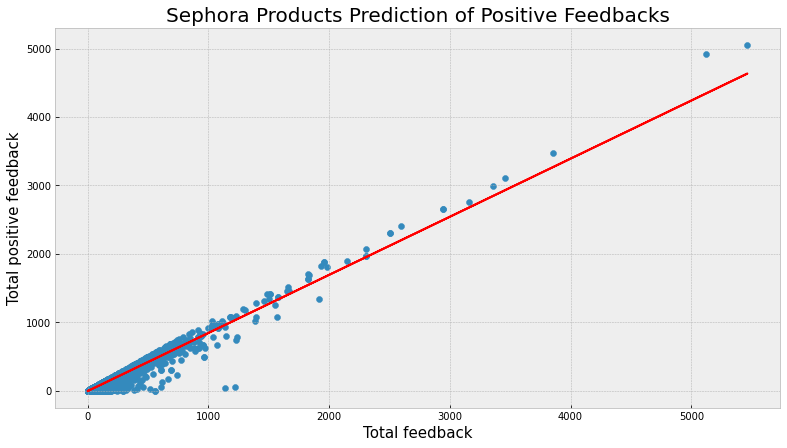

In [33]:
# Visualize the prediction of positive feedbacks
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (13,7)
plt.xlabel("Total feedback", fontsize=15)
plt.ylabel("Total positive feedback", fontsize=15)
plt.title("Sephora Products Prediction of Positive Feedbacks", fontsize=20)
plt.plot(x,regression.predict(x.values.reshape(-1,1)), color='red')
plt.scatter(x,y)


# Filtering the Total Positive Feedback of Sephora's Skin Care Products by Ratings and Price

In [34]:
# Filtered data

widget_output2 = widgets.Output(layout=Layout(width='100%'))

def click2(c):
    
    with widget_output2:
        try:
            widget_output2.clear_output()
            original_data2 = reviews_numeric_clean2[(reviews_numeric_clean2['rating'] == drop_down.value) & 
                                          (reviews_numeric_clean2['price_usd'] >= float(from_range.value)) &  
                                          (reviews_numeric_clean2['price_usd'] <= float(to_range.value))]
            display(original_data2)
            x = original_data2['total_feedback_count']
            y = original_data2['total_pos_feedback_count']
            
            X = sm.add_constant(x)
            linear_regression_summary = sm.OLS(y,X).fit()
            display(linear_regression_summary.summary())
            
            plt.style.use("bmh")
            plt.rcParams["figure.figsize"] = (13,7)
            plt.xlabel("Total feedback", fontsize=15)
            plt.ylabel("Total positive feedback", fontsize=15)
            plt.title("Sephora Products Prediction of Positive Feedbacks", fontsize=20)
            plt.plot(x,regression.predict(x.values.reshape(-1,1)), color='red')
            plt.scatter(x,y)
            plt.show()
        except ValueError:
            print('Please input or select the right value')
        
        
        

button = widgets.Button(description='Submit')
button.on_click(click2)


widgets.VBox([widgets.Label('Price USD'), from_range, to_range, widgets.Label('Ratings'), drop_down, button, widget_output2])